## Reproduction of the theoretical results in the paper (Page 10-12)

Figure 8: Whole-domain error comparison in the classical domain.

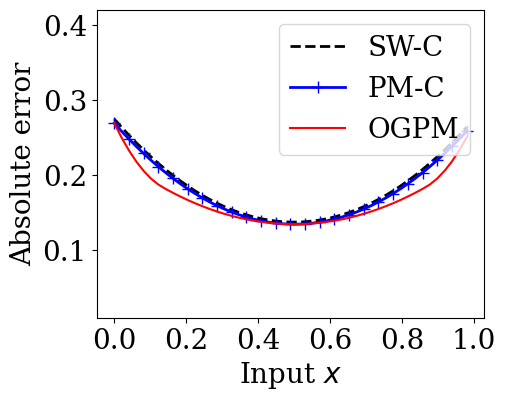

In [14]:
import numpy as np
from SW import SW_on_01
from PM import PM_on_01
from src.distance_metric import l1_distance
from src.min_error_mechanism import MinL1Mechanism

epsilon = 2
endpoint_a, endpoint_b = 0, 1
total_piece = 3
x = np.linspace(0, 1, 49, endpoint=False)

distance_SW_C = np.zeros(len(x))
distance_PM_C = np.zeros(len(x))
distance_optimal = np.zeros((len(x)))

for i, _ in enumerate(x):
    # SW-C
    p, l = SW_on_01(epsilon, x[i])
    distance_SW_C[i] = l1_distance(endpoint_a, endpoint_b, total_piece, p, l, x[i])
    # PM-C
    p, l = PM_on_01(epsilon, x[i])
    distance_PM_C[i] = l1_distance(endpoint_a, endpoint_b, total_piece, p, l, x[i])
    # OGPM
    opt_PM = MinL1Mechanism(endpoint_a, endpoint_b, epsilon, total_piece)
    opt_PM.solve_probabilities()
    distance_optimal[i] = opt_PM.solve_lr(x[i])[1]
# Plotting the results
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(5, 4))
plt.plot(x, distance_SW_C, label='SW-C', linewidth=2, linestyle='--', color=[0, 0, 0])
plt.plot(x, distance_PM_C, label='PM-C', linewidth=2, linestyle='-', color=[0, 0, 1], marker='+', markersize=8, markevery=2)
plt.plot(x, distance_optimal, label='OGPM', linestyle='-', color=[1, 0, 0])
plt.xlabel(r'Input $x$')
plt.ylabel(r'Absolute error')
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 0.42, 0.1))
plt.ylim(0.01, 0.42)
plt.legend(loc='upper right')
plt.show()

This figure shows the results for $\varepsilon = 2$ (Figure 8a). The results for $\varepsilon = 4$ (Figure 8b) are similar, only need to change the value of `epsilon` in the code above. We omit it here for brevity.

Figure 9: Worst-case error comparison in the classical domain.

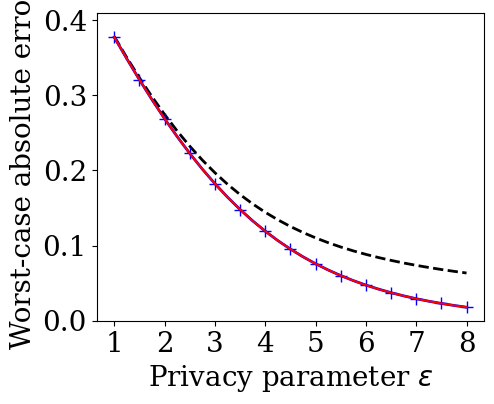

In [8]:
epsilon = np.linspace(1, 8, 29, endpoint=True)

distance_SW = np.zeros(len(epsilon))
distance_PM = np.zeros(len(epsilon))
distance_optimal = np.zeros((len(epsilon)))

for i, _ in enumerate(epsilon):
    # SW-C
    p, l = SW_on_01(epsilon[i], 0)
    distance_SW[i] = l1_distance(endpoint_a, endpoint_b, total_piece, p, l, 0)
    # PM-C
    p, l = PM_on_01(epsilon[i], 0)
    distance_PM[i] = l1_distance(endpoint_a, endpoint_b, total_piece, p, l, 0)
    # OGPM
    opt_PM = MinL1Mechanism(endpoint_a, endpoint_b, epsilon[i], total_piece)
    distance_optimal[i] = opt_PM.solve_probabilities()[2]
# Plotting the results
plt.figure(figsize=(5, 4))
plt.plot(epsilon, distance_SW, label='SW-C', linewidth=2, linestyle='--', color=[0, 0, 0])
plt.plot(epsilon, distance_PM, label='PM-C', linewidth=2, linestyle='-', color=[0, 0, 1], marker='+', markersize=8, markevery=2)
plt.plot(epsilon, distance_optimal, label='OGPM', linestyle='-', color=[1, 0, 0])
plt.xlabel(r'Privacy parameter $\varepsilon$')
plt.ylabel(r'Worst-case absolute error')
plt.xticks(np.arange(1, 9, 1))
plt.yticks(np.arange(0, 0.41, 0.1))
plt.ylim(0, 0.41)
plt.legend(loc='upper right')
plt.show()

This figure shows the results for the absolute error (Figure 9a). The results for the squared error (Figure 9b) are similar, only need to import the `l2_distance` in the code above. See the script `theoretical/classical_domain/' for the complete code. We omit it here for brevity.

Figure 10: Whole-domain error comparison in the circular domain.

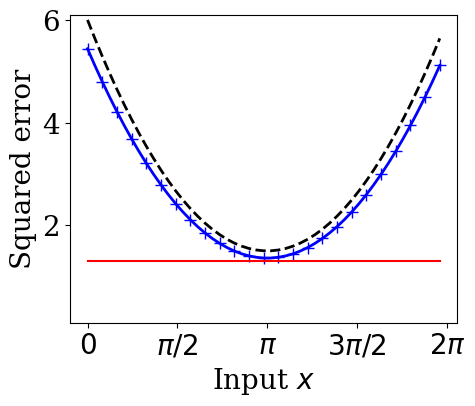

In [10]:
from SW import SW_on_D
from PM import PM_on_D
from src.distance_metric import l2_distance
from src.min_error_mechanism import MinL2Mechanism

epsilon = 2
endpoint_a, endpoint_b = 0, 6.28
total_piece = 3
x = np.linspace(endpoint_a, endpoint_b, 49, endpoint=False)

distance_SW = np.zeros(len(x))
distance_PM = np.zeros(len(x))
distance_optimal = np.zeros((len(x)))

for i, _ in enumerate(x):
    # SW
    p, l = SW_on_D(endpoint_a, endpoint_b, epsilon, x[i])
    distance_SW[i] = l2_distance(endpoint_a, endpoint_b, total_piece, p, l, x[i])
    # PM
    p, l = PM_on_D(endpoint_a, endpoint_b, epsilon, x[i])
    distance_PM[i] = l2_distance(endpoint_a, endpoint_b, total_piece, p, l, x[i])
    # OGPM
    opt_PM = MinL2Mechanism(endpoint_a, endpoint_b, epsilon, total_piece)
    opt_PM.solve_probabilities()
    distance_optimal[i] = opt_PM.solve_lr(3.14)[1]  # the error is the same for all x in the circular domain
# Plotting the results
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
ax.plot(x, distance_SW, label='SW', linewidth=2, linestyle='--', color=[0, 0, 0])
ax.plot(x, distance_PM, label='PM', linewidth=2, linestyle='-', color=[0, 0, 1], marker='+', markersize=8, markevery=2)
ax.plot(x, distance_optimal, label='OGPM', linestyle='-', color=[1, 0, 0])
ax.set_xlabel(r'Input $x$')
ax.set_ylabel(r'Squared error')
ax.set_xticks([0, 1.57, 3.14, 4.71, 6.28])
ax.set_xticklabels(['$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
ax.set_yticks(np.arange(0, 6.1, 2))
ax.set_ylim(0.1, 6.1)
ax.legend(loc='upper right')
plt.show()

Figure 11: Worst-case error comparison in the circular domain.

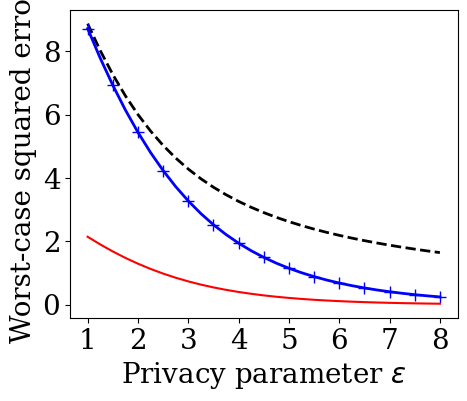

In [12]:
epsilon = np.linspace(1, 8, 29, endpoint=True)

distance_SW = np.zeros(len(epsilon))
distance_PM = np.zeros(len(epsilon))
distance_optimal = np.zeros((len(epsilon)))

for i, _ in enumerate(epsilon):
    # SW
    p, l = SW_on_D(endpoint_a, endpoint_b, epsilon[i], 0)
    distance_SW[i] = l2_distance(0, endpoint_b, total_piece, p, l, 0)
    # PM
    p, l = PM_on_D(endpoint_a, endpoint_b, epsilon[i], 0)
    distance_PM[i] = l2_distance(endpoint_a, endpoint_b, total_piece, p, l, 0)
    # OGPM
    opt_PM = MinL2Mechanism(endpoint_a, endpoint_b, epsilon[i], total_piece)
    opt_PM.solve_probabilities()
    distance_optimal[i] = opt_PM.solve_lr(x=3.14)[1]
# Plotting the results
plt.figure(figsize=(5, 4))
plt.plot(epsilon, distance_SW, label='SW', linewidth=2, linestyle='--', color=[0, 0, 0])
plt.plot(epsilon, distance_PM, label='PM', linewidth=2, linestyle='-', color=[0, 0, 1], marker='+', markersize=8, markevery=2)
plt.plot(epsilon, distance_optimal, label='OGPM', linestyle='-', color=[1, 0, 0])
plt.xlabel(r'Privacy parameter $\varepsilon$')
plt.ylabel(r'Worst-case squared error')
plt.xticks(np.arange(1, 9, 1))
plt.legend(loc='upper right')
plt.show()

Figure 12: Ablation study on the number of pieces in the circular domain.